In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [2]:
sns.set(font_scale=1.1)

df = pd.read_csv("../datasets/merged/master_improved.csv", parse_dates=["Unnamed: 0"])
df = df.rename(columns={"Unnamed: 0": "Date"}).set_index("Date")
df.head()

,btc_close,active_addresses,dxy_close,eth_close,fear_greed,gold_close,interest_rate,sp500_close,trend,btc_log_return,btc_rsi,eth_log_return,sp500_log_return,gold_log_return,dxy_log_return
Date,,,,,,,,,,,,,,,
2014-09-17,457.334015,160989.0,84.699997,NaN,NaN,1234.400024,0.09,2001.569946,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,160989.0,84.320000,NaN,NaN,1225.699951,0.09,2011.359985,22.0,-0.074643,NaN,NaN,0.004879,-0.007073,-0.004496
2014-09-19,394.795990,143062.0,84.800003,NaN,NaN,1215.300049,0.09,2010.400024,22.0,-0.072402,NaN,NaN,-0.000477,-0.008521,0.005676
2014-09-20,408.903992,143062.0,84.800003,NaN,NaN,1215.300049,0.09,2010.400024,22.0,0.035111,NaN,NaN,0.000000,0.000000,0.000000
2014-09-21,398.821014,143062.0,84.800003,NaN,NaN,1215.300049,0.09,2010.400024,22.0,-0.024968,NaN,NaN,0.000000,0.000000,0.000000


## Análisis de BTC

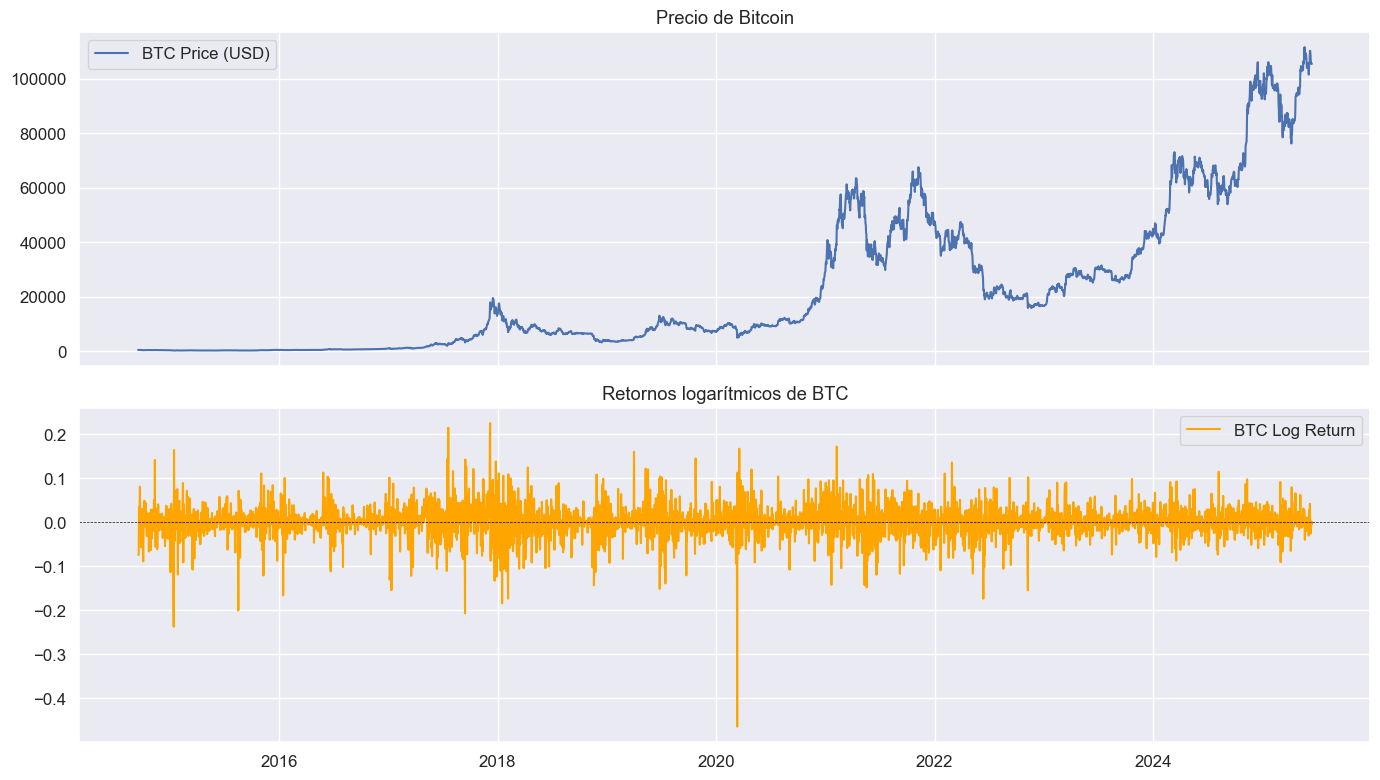

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Precio BTC
axs[0].plot(df["btc_close"], label="BTC Price (USD)")
axs[0].set_title("Precio de Bitcoin")
axs[0].legend()

# Retorno logarítmico
axs[1].plot(df["btc_log_return"], color='orange', label="BTC Log Return")
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1].set_title("Retornos logarítmicos de BTC")
axs[1].legend()

plt.tight_layout()
plt.show()

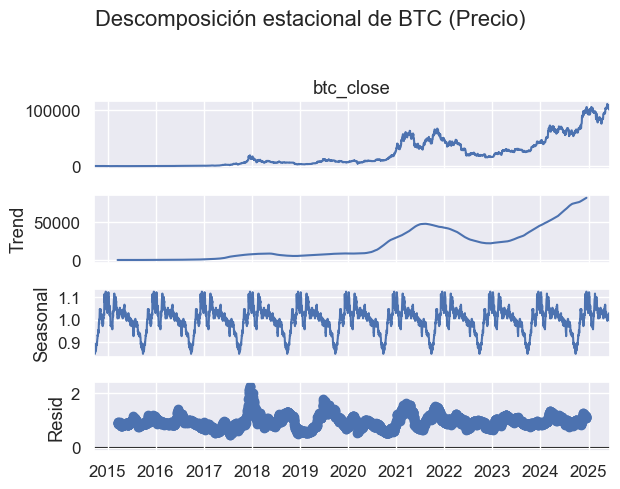

In [4]:
btc_series = df["btc_close"].dropna()
btc_series = btc_series.asfreq("D")

result = seasonal_decompose(btc_series, model="multiplicative", period=365)
result.plot()
plt.suptitle("Descomposición estacional de BTC (Precio)", y=1.02)
plt.tight_layout()
plt.show()

In [5]:
def test_stationarity(series, name):
    print(f"\n📌 Pruebas de estacionariedad para: {name}")

    # ADF
    adf_result = adfuller(series.dropna())
    print("ADF Test:")
    print(f"  ➤ p-value: {adf_result[1]:.4f}")
    print(f"  ➤ {'Estacionaria' if adf_result[1] < 0.05 else 'No estacionaria'} según ADF")

    # KPSS
    try:
        kpss_result = kpss(series.dropna(), regression='c', nlags="auto")
        print("KPSS Test:")
        print(f"  ➤ p-value: {kpss_result[1]:.4f}")
        print(f"  ➤ {'Estacionaria' if kpss_result[1] > 0.05 else 'No estacionaria'} según KPSS")
    except:
        print("  ⚠️ KPSS no pudo calcularse (posible error de valores constantes)")

# Aplicar a btc_log_return
test_stationarity(df["btc_log_return"], "btc_log_return")


📌 Pruebas de estacionariedad para: btc_log_return
ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.1000
  ➤ Estacionaria según KPSS


C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")


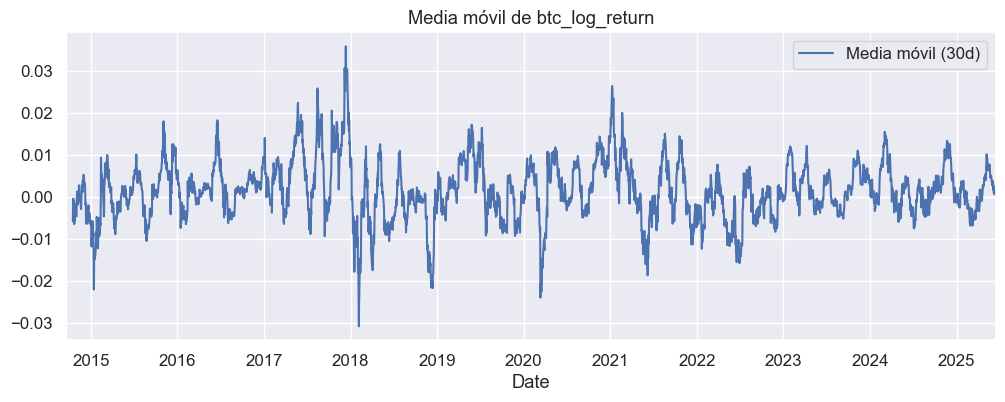

In [6]:
# Visual rápida de media móvil
df["btc_log_return"].rolling(30).mean().plot(figsize=(12, 4), label="Media móvil (30d)")
plt.title("Media móvil de btc_log_return")
plt.legend()
plt.show()

## Análisis de otras variables

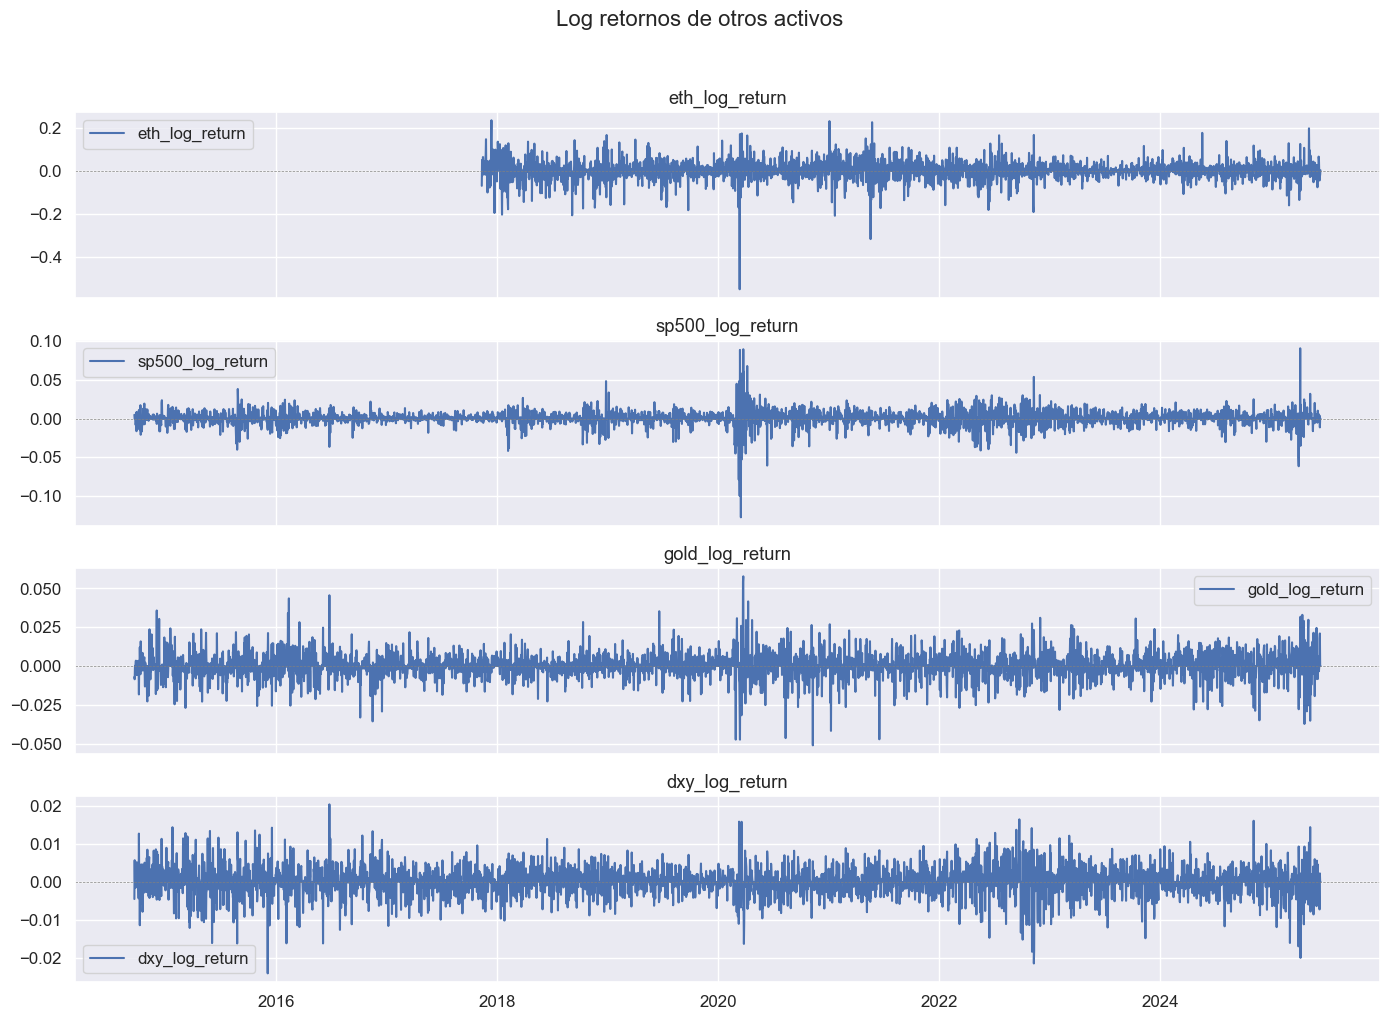

In [17]:
variables = [
    "eth_log_return", "sp500_log_return", "gold_log_return", "dxy_log_return"
]

fig, axs = plt.subplots(len(variables), 1, figsize=(14, 10), sharex=True)

for i, var in enumerate(variables):
    axs[i].plot(df.index, df[var], label=var)
    axs[i].set_title(var)
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=0.5)
    axs[i].legend()

plt.suptitle("Log retornos de otros activos", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

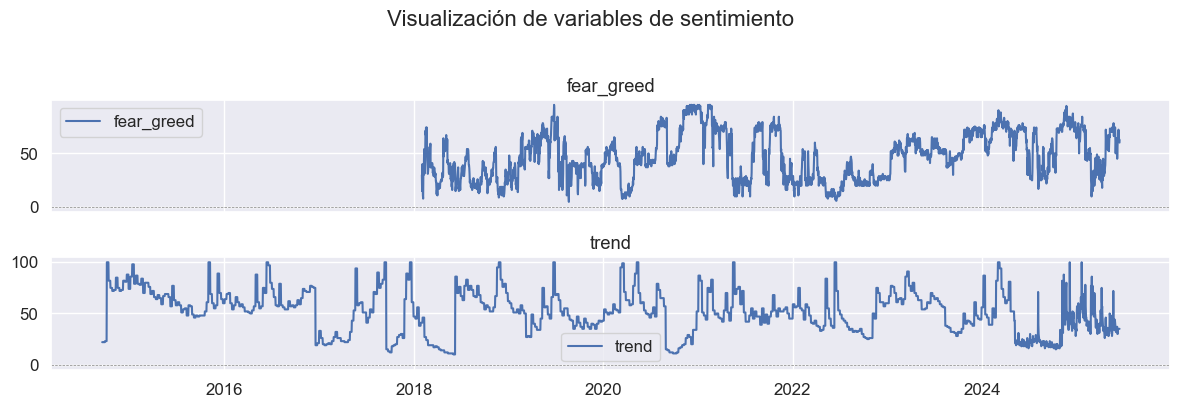

In [16]:
variables = [
    "fear_greed", "trend"
]

fig, axs = plt.subplots(len(variables), 1, figsize=(12, 4), sharex=True)

for i, var in enumerate(variables):
    axs[i].plot(df.index, df[var], label=var)
    axs[i].set_title(var)
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=0.5)
    axs[i].legend()

plt.suptitle("Visualización de variables de sentimiento", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

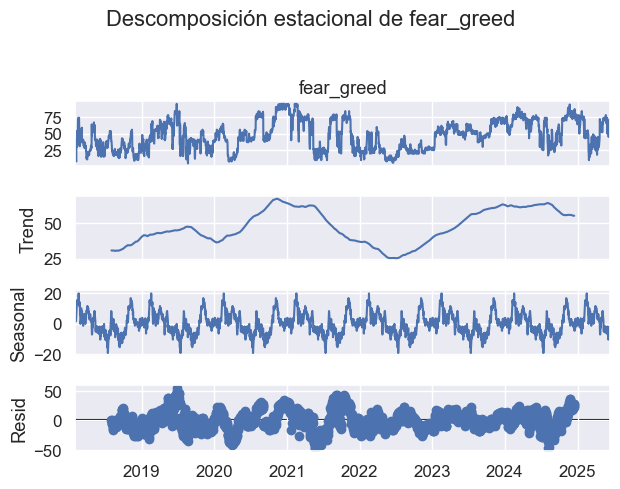

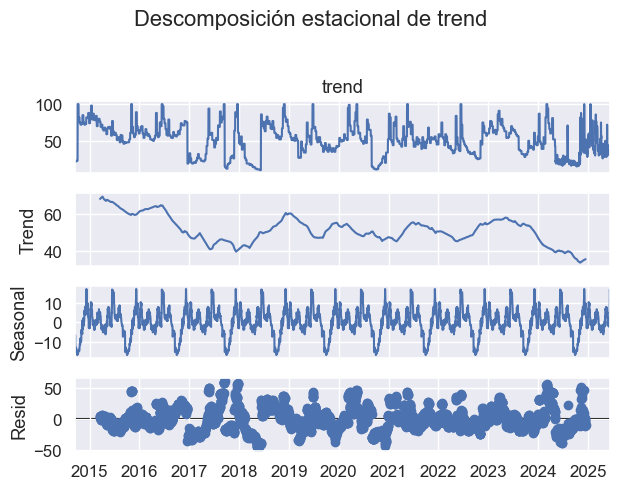

In [19]:

seasonal_vars = ["fear_greed", "trend"]

for var in seasonal_vars:
    series = df[var].dropna()
    series = series.asfreq("D")
    result = seasonal_decompose(series, model="additive", period=365)

    # Plot
    result.plot()
    plt.suptitle(f"Descomposición estacional de {var}", y=1.02)
    plt.tight_layout()
    plt.show()

Asumo modelos aditivos porque:

- Ambas variables se mueven en un rango limitado (0–100 y 0–100 respectivamente).

- No tienen una tendencia creciente fuerte.

- Las oscilaciones parecen constantes a lo largo del tiempo.

In [20]:
for var in ["eth_log_return", "sp500_log_return", "fear_greed", "trend", "gold_log_return", "dxy_log_return"]:
    test_stationarity(df[var], var)



📌 Pruebas de estacionariedad para: eth_log_return
ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.1000
  ➤ Estacionaria según KPSS

📌 Pruebas de estacionariedad para: sp500_log_return
ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.1000
  ➤ Estacionaria según KPSS

📌 Pruebas de estacionariedad para: fear_greed
ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.0100
  ➤ No estacionaria según KPSS

📌 Pruebas de estacionariedad para: trend


C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")


ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.0100
  ➤ No estacionaria según KPSS

📌 Pruebas de estacionariedad para: gold_log_return
ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.1000
  ➤ Estacionaria según KPSS

📌 Pruebas de estacionariedad para: dxy_log_return
ADF Test:
  ➤ p-value: 0.0000
  ➤ Estacionaria según ADF
KPSS Test:
  ➤ p-value: 0.1000
  ➤ Estacionaria según KPSS


C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\Ramiro\AppData\Local\Temp\ipykernel_42024\4208166110.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c', nlags="auto")


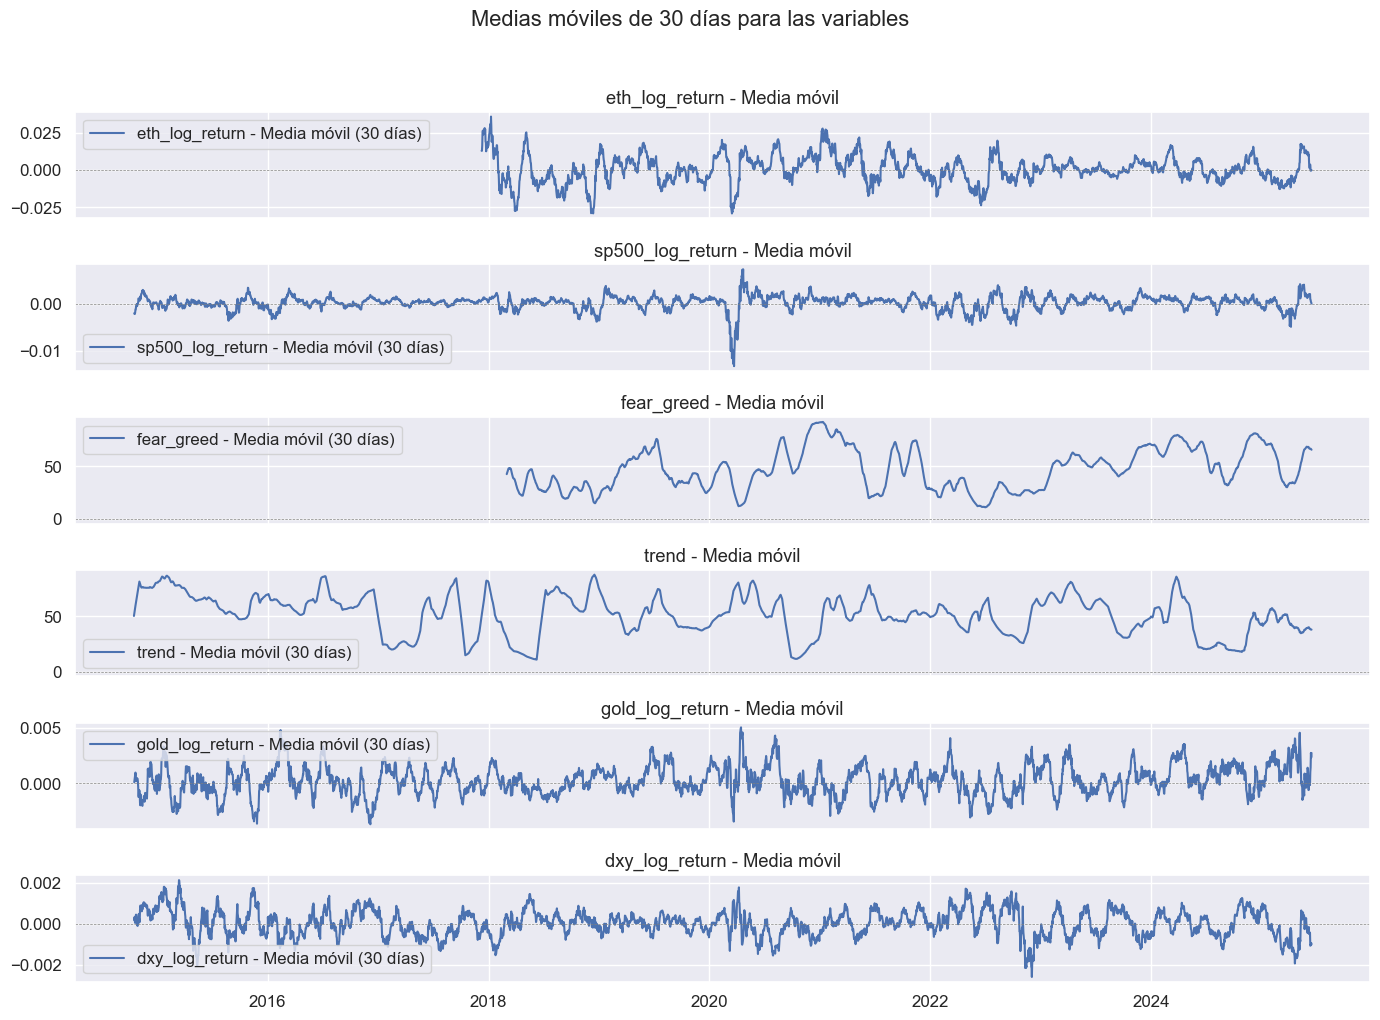

In [22]:
window = 30
variables = [
    "eth_log_return", "sp500_log_return", "fear_greed",
    "trend", "gold_log_return", "dxy_log_return"
]

fig, axs = plt.subplots(len(variables), 1, figsize=(14, 10), sharex=True)

for i, var in enumerate(variables):
    axs[i].plot(df.index, df[var].rolling(window).mean(), label=f"{var} - Media móvil ({window} días)")
    axs[i].set_title(f"{var} - Media móvil")
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=0.5)
    axs[i].legend()

plt.suptitle("Medias móviles de 30 días para las variables", y=1.02)
plt.tight_layout()
plt.show()
